# Ciclo di progettazione per un sistema standard del secondo ordine

Prenderemo come esempio i sistemi del secondo ordine. Tuttavia, prima di immergersi nel ciclo di progettazione, è fondamentale capire che, sebbene i sistemi del mondo reale potrebbero non essere sempre di secondo ordine, padroneggiare la progettazione di tali sistemi è fondamentale. Questa conoscenza può essere estesa a sistemi più complessi. Iniziamo con un sistema standard del secondo ordine in una configurazione a feedback unitario.

### La descrizione del sistema

Consideriamo la funzione di trasferimento $G(s)$ nel percorso in avanti di un sistema a retroazione unitaria:

$$
G(s) = \frac{\omega_n^2}{s(s + 2\zeta\omega_n)}
$$

<table>
<tr>
    <img src="../pics/19_Design_of_feedback_control_system_1.png?1" alt="19_Design_of_feedback_control_system_1" style="width:450px;"/>
</tr></table>

### Analisi e progettazione

- **Problema di analisi**: determina il comportamento del sistema senza alcun controller ($D(s)$).
- **Problema di progettazione**: introdurre un controller $D(s)$ per soddisfare i requisiti transitori e stazionari specificati.

## Analisi

Determina il comportamento del sistema senza alcun controller:

<table>
<tr>
    <img src="../pics/19_Design_of_feedback_control_system_1.png?1" alt="19_Design_of_feedback_control_system_1" style="width:450px;"/>
</tr></table>

$$
G(s) = \frac{\omega_n^2}{s(s + 2\zeta\omega_n)}
$$

e la funzione di trasferimento ad anello chiuso $Y(s)/R(s)$ è data da:

$$
\frac{Y(s)}{R(s)} = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}
$$

Dove:
- $ \omega_n $ è la frequenza naturale non smorzata.
- $ \zeta $ è il rapporto di smorzamento.

### Comprendere il rapporto di smorzamento ($\zeta$)

- **Sistema non smorzato ($\zeta = 0$)**: comportamento puramente oscillatorio.
- **Sotto-Smorzato ($0 < \zeta < 1$)**: Oscillatory but decaying response.
- **Critically Damped ($\zeta = 1$)**: Fastest return to equilibrium without overshooting.
- **Over-Damped ($\zeta > 1$)**: Ritorno lento all'equilibrio senza oscillazioni.

### Equazione caratteristica e radici

L'equazione caratteristica è:

$$
\Delta (s) = s^2 + 2\zeta\omega_n s + \omega_n^2
$$

Le radici di questa equazione (poli a circuito chiuso o radici caratteristiche) sono fondamentali per l'analisi del comportamento del sistema.


Le radici caratteristiche di un sistema standard del secondo ordine possono essere derivate dalla sua equazione caratteristica. Per il sistema rappresentato dalla funzione di trasferimento $ G(s) = \frac{\omega_n^2}{s(s + 2\zeta\omega_n)} $, l'equazione caratteristica si ottiene dal denominatore del trasferimento ad anello chiuso funzione:

$$
\Delta s = s^2 + 2\zeta\omega_n s + \omega_n^2 = 0
$$

Per trovare le radici di questa equazione caratteristica, risolviamo $ s $. Queste radici, note anche come poli del sistema, determinano il comportamento del sistema.

Risolvendo l'equazione quadratica $ s^2 + 2\zeta\omega_n s + \omega_n^2 = 0 $ utilizzando la formula quadratica, otteniamo:

$$
s = \frac{-2\zeta\omega_n \pm \sqrt{(2\zeta\omega_n)^2 - 4\omega_n^2}}{2}
$$

Semplificando ulteriormente:

$$
s = \frac{-2\zeta\omega_n \pm \sqrt{4\zeta^2\omega_n^2 - 4\omega_n^2}}{2}
$$

$$
s = \frac{-2\zeta\omega_n \pm \sqrt{4\omega_n^2(\zeta^2 - 1)}}{2}
$$

$$
s = \frac{-2\zeta\omega_n \pm 2\omega_n\sqrt{\zeta^2 - 1}}{2}
$$

$$
s = -\zeta\omega_n \pm \omega_n\sqrt{\zeta^2 - 1}
$$

Quindi, le radici (o poli) caratteristiche sono:

$$
s = -\zeta\omega_n \pm \omega_n\sqrt{\zeta^2 - 1}
$$

A seconda del valore di $ \zeta $ (il rapporto di smorzamento), queste radici possono essere reali o complesse:

- **Per $ \zeta < 1 $** (under-damped): The roots are complex conjugates.
  
  $$ s = -\zeta\omega_n \pm j\omega_n\sqrt{1 - \zeta^2} $$

- **For $ \zeta = 1 $** (critically damped): The roots are real and identical.
  
  $$ s = -\omega_n $$

- **For $ \zeta > 1 $** (sovrasmorzato): le radici sono numeri reali distinti.

Queste radici sono cruciali per comprendere la risposta transitoria, la stabilità e il comportamento generale del sistema.

#### Visualizzazione caratteristica delle radici

- **Per $ \zeta = 0 $** (sottosmorzato):
  
  $$ s = \pm j\omega_n $$
  
- **Per $ \zeta = 1 $** (criticamente smorzato): le radici sono reali e identiche.
  
  $$ s = -\omega_n $$
  
Possiamo tracciare come si muovono le radici nel piano s.

Usiamo Python per questo eseguendo la cella sottostante

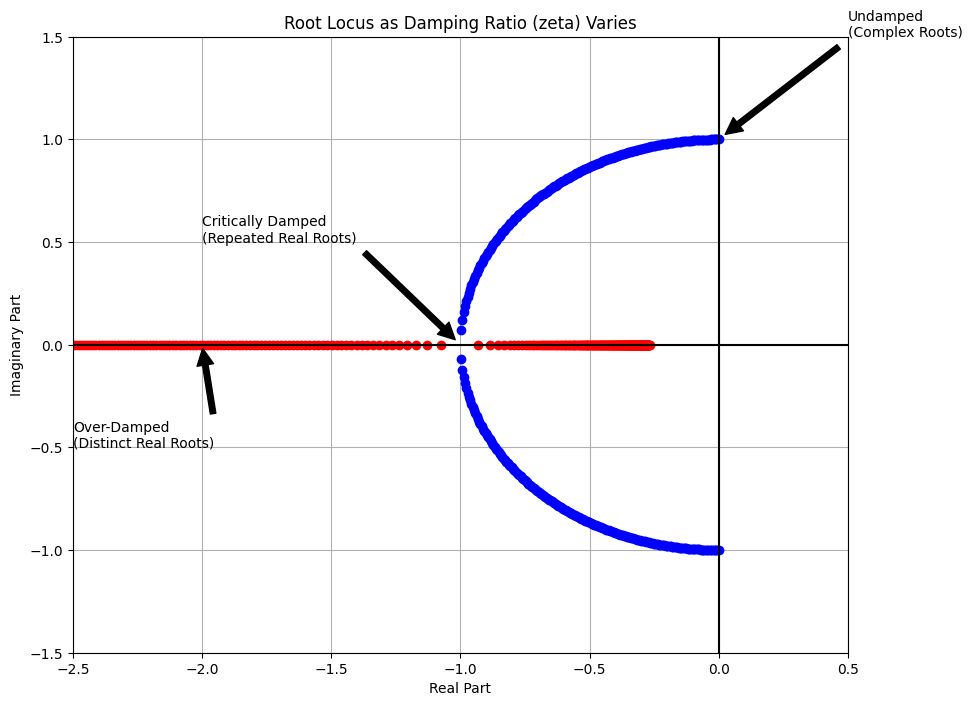

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the undamped natural frequency
omega_n = 1  # You can adjust this as needed

# Create a range of zeta values from 0 to 2
zeta_values = np.linspace(0, 2, 400)

# Prepare a plot
plt.figure(figsize=(10, 8))

for zeta in zeta_values:
    # Calculate the roots for each zeta
    if zeta < 1:
        # Under-damped (Complex conjugate roots)
        roots = [-zeta * omega_n + 1j * omega_n * np.sqrt(1 - zeta**2),
                 -zeta * omega_n - 1j * omega_n * np.sqrt(1 - zeta**2)]
        color = 'blue'
    elif zeta == 1:
        # Critically damped (Repeated real roots)
        roots = [-zeta * omega_n, -zeta * omega_n]
        color = 'green'
    else:
        # Over-damped (Distinct real roots)
        roots = [-zeta * omega_n + omega_n * np.sqrt(zeta**2 - 1),
                 -zeta * omega_n - omega_n * np.sqrt(zeta**2 - 1)]
        color = 'red'
    
    # Plot the roots
    plt.plot([root.real for root in roots], [root.imag for root in roots], 'o', color=color)

# Annotating key points
plt.annotate('Undamped\n(Complex Roots)', xy=(0, omega_n), xytext=(0.5, omega_n+0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Critically Damped\n(Repeated Real Roots)', xy=(-omega_n, 0), xytext=(-2, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Over-Damped\n(Distinct Real Roots)', xy=(-2*omega_n, 0), xytext=(-2.5, -0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Setting plot features
plt.title('Root Locus as Damping Ratio (zeta) Varies')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.axhline(y=0, color='k')  # x-axis
plt.axvline(x=0, color='k')  # y-axis
plt.grid(True)
plt.xlim(-2.5, 0.5)
plt.ylim(-1.5, 1.5)

# Show the plot
plt.show()


- La quantità $\zeta\omega_n$ ha un ruolo molto importante: è la parte reale della coppia complessa coniugata.

<table>
<tr>
    <img src="../pics/19_Design_of_feedback_control_system_roots
.png?1" alt="19_Design_of_feedback_control_system_roots
" style="width:450px;"/>
</tr></table>

#### Determinazione dell'angolo di smorzamento ($\theta$)

Data la geometria del diagramma del luogo delle radici sopra possiamo determinare l'angolo $\theta$ (suggerimento: il raggio del cerchio è $\omega_n$):

$$
\omega_n\cos\theta = \zeta\omega_n
$$

$$
\cos(\theta) = \zeta \\
\theta = \cos^{-1}(\zeta)
$$

- **L'angolo $\theta$ è chiamato angolo di smorzamento perché è una funzione solo di $\zeta$ (e non dipende da $\omega_n$.**

- La linea della costante $\theta$ (e quindi della costante $\zeta$) è chiamata **linea di smorzamento**. Dato uno specifico $\zeta$ le radici si troveranno lungo la linea di smorzamento associata.

Dati i poli specifici $\theta$, $\omega_n$ del circuito chiuso, le radici dell'equazione caratteristica sono:

<table>
<tr>
    <img src="../pics/19_Design_of_feedback_control_system_roots_1
.png?1" alt="19_Design_of_feedback_control_system_roots_1
" style="width:450px;"/>
</tr></table>

oppure: $$ s = -\zeta\omega_n \pm j\omega_n\sqrt{1 - \zeta^2} $$

Ciò significa che dati $\theta$, $\omega_n$ specifici possiamo tradurre questi valori in poli ad anello chiuso.

Il criterio di progettazione sarà quindi quello di forzare i poli del circuito chiuso nella posizione desiderata, dove si ottengono le prestazioni desiderate (ovvero, soddisfare le specifiche di risposta transitoria).

### BARRA LATERALE - Relazione tra $\zeta$, $\omega_n$ e poli ad anello chiuso



1. **Relazione tra $\zeta$, $\omega_n$ e poli ad anello chiuso**:
    - In un sistema standard del secondo ordine, i parametri $\zeta$ (rapporto di smorzamento) e $\omega_n$ (frequenza naturale non smorzata) sono determinanti chiave del comportamento del sistema.
    - I valori di $\zeta$ e $\omega_n$ definiscono direttamente la posizione dei poli del circuito chiuso nel piano complesso. Ad esempio, un cambiamento in $\zeta$ e $\omega_n$ sposterà questi poli, influenzando la risposta transitoria del sistema.

2. **Equivalenza di specificare $\zeta$, $\omega_n$ e poli ad anello chiuso**:
    - Quando si specifica $\zeta$ e $\omega_n$ per un sistema del secondo ordine, equivale a specificare le posizioni desiderate dei poli a circuito chiuso. Questo perché esiste una relazione diretta e calcolabile tra questi parametri e i poli.
    - I poli a circuito chiuso, a loro volta, determinano le principali caratteristiche prestazionali del sistema, come superamento, tempo di assestamento e frequenza di oscillazione.

3. **Importanza nella progettazione del luogo delle radici**:
    - Questa comprensione costituisce la base della progettazione del luogo delle radici, un metodo utilizzato per determinare la stabilità di un sistema di controllo e progettare controllori.
    - Nella progettazione del luogo delle radici, in genere si inizia con una risposta transitoria desiderata (definita da $\zeta$ e $\omega_n$) e quindi si regola il controller per spostare i poli del sistema in queste posizioni predefinite nel piano complesso.

4. **Traduzione di $\zeta$ e $\omega_n$ in posizioni dei poli a circuito chiuso**:
    - Specificando $\zeta$ e $\omega_n$, essenzialmente imposti un obiettivo per dove vuoi che siano i poli a circuito chiuso. L'attività di progettazione diventa quindi una questione di modifica del sistema (spesso tramite un controller) in modo che i suoi poli effettivi si allineino con queste posizioni target.
    - Il raggiungimento di questo allineamento garantisce che la risposta transitoria del sistema soddisfi i criteri di prestazione specificati.

Nel contesto di un sistema standard del secondo ordine, specificare $\zeta$ e $\omega_n$ è un modo per definire le caratteristiche prestazionali desiderate. Il metodo del luogo delle radici utilizza quindi queste specifiche per progettare un sistema di controllo che posiziona i poli del circuito chiuso in posizioni che garantiscono il rispetto di queste caratteristiche prestazionali. Si tratta di un approccio fondamentale nella progettazione dei sistemi di controllo, poiché consente agli ingegneri di personalizzare i sistemi per soddisfare specifici requisiti di risposta ai transitori.

## Caratteristiche della risposta transitoria

Analizziamo ora la risposta di un sistema sotto-smorzato ad un input a passo unitario:

$$
R(s) = \frac{1}{s}
$$

In questo caso, l'output è:

$$
Y(s) = \frac{\omega_n^2}{s(s^2 + 2\zeta\omega_n s + \omega_n^2)}
$$

La funzione di risposta, ottenuta come trasformata inversa di Laplace, è:

$$
y(t) = 1 - \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}}\sin(\omega_d t + \theta)
$$

Dove:
- $ \omega_d = \omega_n\sqrt{1-\zeta^2} $ è la frequenza smorzata.
- $\theta = \cos^{-1}(\zeta)$ è l'angolo di smorzamento.

In questo caso i poli sono complessi coniugati.

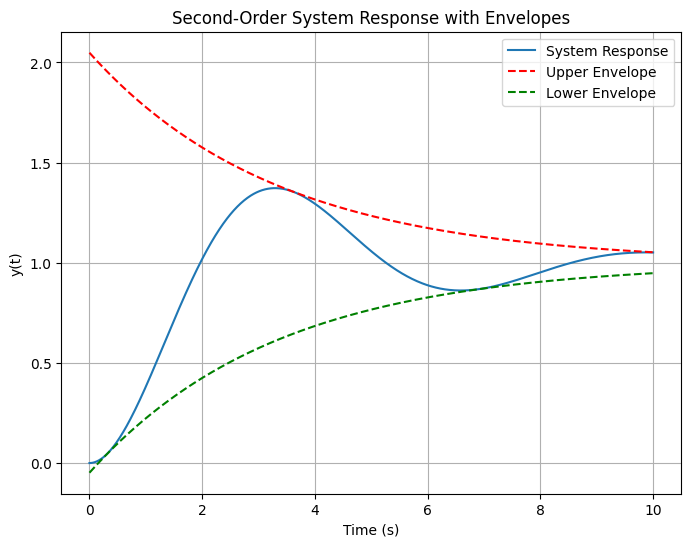

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
zeta = 0.3       # Damping ratio
omega_n = 1.0    # Natural frequency (rad/s)
t = np.linspace(0, 10, 1000)  # Time vector

# Calculate the angular frequency and phase angle
omega_d = omega_n * np.sqrt(1 - zeta**2)
theta = np.arctan2(omega_n * np.sqrt(1 - zeta**2), zeta)

# Compute the system response
y = 1 - (np.exp(-zeta * omega_n * t) / np.sqrt(1 - zeta**2)) * np.sin(omega_d * t + theta)

# Compute the upper and lower envelope curves
upper_envelope = 1 + (np.exp(-zeta * omega_n * t) / np.sqrt(1 - zeta**2))
lower_envelope = 1 - (np.exp(-zeta * omega_n * t) / np.sqrt(1 - zeta**2))

# Plot the response and envelope curves
plt.figure(figsize=(8, 6))
plt.plot(t, y, label='System Response')
plt.plot(t, upper_envelope, 'r--', label='Upper Envelope')
plt.plot(t, lower_envelope, 'g--', label='Lower Envelope')
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Second-Order System Response with Envelopes')
plt.grid(True)
plt.legend()
plt.show()


#### Curve d'inviluppo e costante di tempo

La risposta è delimitata dalle curve di inviluppo:

- Busta superiore: $ 1 + \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}} $
- Busta inferiore: $ 1 - \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}} $

Queste curve giocano un ruolo significativo: più velocemente decadono, più veloce è il decadimento della risposta.

La costante di tempo dell'inviluppo è (suggerimento: è una funzione esponenziale): $$ \tau = \frac{1}{\zeta\omega_n} $$

La risposta è:

$$
y(t) = 1 - \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}}\sin(\omega_d t + \theta)
$$

ma è più conveniente tracciare la risposta rispetto al tempo normalizzato $\omega_n t$. Ora abbiamo solo $\zeta$ come parametro:

<table>
<tr>
    <img src="../pics/19_Design_of_feedback_control_system_second_order_response
.png?1" alt="19_Design_of_feedback_control_system_second_order_response
" style="width:650px;"/>
</tr></table>

Notare che:

- per $\zeta=1$ il sistema è criticamente smorzato, praticamente senza oscillazioni.

- per $\zeta>1$ il sistema è eccessivamente smorzato e diventa lento. Questo in genere non è desiderabile in un sistema di controllo.


### Comprendere i compromessi di progettazione

- Un $ \zeta $ più basso (più oscillatorio) porta a un tempo di salita più breve ma a un superamento più elevato.
- Un $\zeta$ più alto (meno oscillatorio) riduce l'overshoot ma aumenta il tempo di salita.

### Indicatori chiave di prestazione transitoria

1. **Tempo di salita ($t_r$)**: tempo impiegato dalla risposta per raggiungere il valore finale.
2. **Tempo di picco ($t_p$)**: Tempo fino al primo picco della risposta.
3. **Superamento massimo ($M_p$)**: Deviazione massima dal valore finale.

#### Calcolo di $t_r$, $t_p$ e $M_p$

Partiamo da

$$
y(t) = 1 - \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}}\sin(\omega_d t + \theta)
$$


#### **Tempo di salita ($t_r$)**:
    
$$ t_r :\;\; y(t_r) = 1 \;\; \Rightarrow \frac{e^{-\zeta\omega_nt_r}}{\sqrt{1-\zeta^2}}\sin(\omega_d t_r + \theta) = 0 \;\; \Rightarrow \sin(\omega_d t_r + \theta) = 0 \;\; \Rightarrow \omega_d t_r + \theta = \pi$$

$$ t_r = \frac{\pi - \theta}{\omega_d} = \frac{\pi - \cos^{-1}(\zeta)}{\omega_n\sqrt{1-\zeta^2}} $$

#### **Ora di punta ($t_p$)**:

Per determinare il tempo per raggiungere il picco ($t_p$) per un sistema standard del secondo ordine, dobbiamo analizzare la risposta del sistema e scoprire quando raggiunge il suo primo massimo. Ciò si verifica in un punto estremo della funzione di risposta, dove la derivata prima della risposta rispetto al tempo ($t$) è uguale a zero.

Analizziamo i passaggi per trovare $t_p$:

1. **La funzione di risposta**:

   Per un sistema di secondo ordine sottosmorzato ($0 < \zeta < 1$), the step response is given by:
   $$
   y(t) = 1 - \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}}\sin(\omega_d t + \theta)
   $$
   where $\omega_d = \omega_n\sqrt{1-\zeta^2}$ and $\theta = \cos^{-1}(\zeta)$.

2. **Finding the Extremum**:

   The extremum occurs where the derivative of $y(t)$ with respect to $t$ is zero. Let's find this derivative:

   $$
   \frac{dy}{dt} = \zeta\omega_n \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}}\sin(\omega_d t + \theta) - \omega_d \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}}\cos(\omega_d t + \theta).
   $$

   Setting $\frac{dy}{dt} = 0$ gives us the condition for the peak.

3. **Simplifying the Equation**:

   The equation $\frac{dy}{dt} = 0$ simplifies to:
   $$
   \zeta\sin(\omega_d t + \theta) = \sqrt{1-\zeta^2}\cos(\omega_d t + \theta).
   $$

   Using the identity $\sin(a + b) = \sin(a)\cos(b) + \cos(a)\sin(b)$, we get:
   $$
   \zeta[\sin(\omega_d t)\cos(\theta) + \cos(\omega_d t)\sin(\theta)] = \sqrt{1-\zeta^2}\cos(\omega_d t).
   $$

   Since $\theta = \cos^{-1}(\zeta)$, $\sin(\theta) = \sqrt{1-\zeta^2}$ and $\cos(\theta) = \zeta$. Substituting these into the equation, we simplify it to:
   $$
   \zeta^2\sin(\omega_d t) + \sqrt{1-\zeta^2}\cos(\omega_d t)\sin(\omega_d t) = \zeta\cos(\omega_d t).
   $$

4. **Finding $t_p$**:

   The equation simplifies to $\sin(\omega_d t) = 0$, indicating that the peak occurs at a multiple of $\pi/\omega_d$. The first peak ($t_p$) occurs at:
   $$
   t_p = \frac{\pi}{\omega_d} = \frac{\pi}{\omega_n\sqrt{1-\zeta^2}}.
   $$

This $t_p$ is the time to peak for the under-damped second-order system's step response. It's important to note that this derivation assumes an under-damped system ($0 < \zeta < 1$). For critically damped ($\zeta = 1$) or over-damped ($\zeta > 1$), l'approccio per trovare $t_p$ sarebbe diverso, poiché in questi casi la risposta del sistema non mostra superamento.

Si noti che il tempo per il primo superamento negativo sarebbe $\omega_d t = 2\pi$, il tempo per il secondo superamento $\omega_d t = 3\pi$ e così via.

#### **Superamento massimo ($M_p$)**:

Per ricavare il valore massimo di superamento ($M_p$) per un sistema di secondo ordine sottosmorzato, dobbiamo valutare la risposta del sistema al momento del picco ($t_p$), che abbiamo determinato in precedenza. Il superamento massimo è la quantità di cui la risposta del sistema supera il suo valore finale (che è 1 per un ingresso a gradino unitario) al primo picco.

1. **Richiama la funzione di risposta**:

   La risposta per un sistema sottosmorzato ($0 < \zeta < 1$) a un ingresso a gradino unitario è:
   
   $$
   y(t) = 1 - \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}}\sin(\omega_d t + \theta),
   $$
   
   dove $\omega_d = \omega_n\sqrt{1-\zeta^2}$ e $\theta = \cos^{-1}(\zeta)$.

2. **Valuta la risposta a $t_p$**:

   Abbiamo precedentemente scoperto che $t_p = \frac{\pi}{\omega_d}$. Sostituendo questo nella funzione di risposta si ottiene:
   
   $$
   y(t_p) = 1 - \frac{e^{-\zeta\omega_n(\pi/\omega_d)}}{\sqrt{1-\zeta^2}}\sin(\omega_d (\pi/\omega_d ) + \theta).
   $$

3. **Semplifica l'espressione**:

   Il termine seno si semplifica come $\sin(\pi + \theta) = -\sin(\theta)$. Poiché $\theta = \cos^{-1}(\zeta)$, abbiamo $\sin(\theta) = \sqrt{1-\zeta^2}$. Perciò:
   
   $$
   y(t_p) = 1 + e^{-\zeta\omega_n(\pi/\omega_d)}.
   $$
   
4. **Calcola il superamento massimo ($M_p$)**:

   L'overshoot massimo è il valore di picco meno il valore di stato stazionario (che è 1 per una risposta al gradino unitaria), quindi:
   
   $$
   M_p = y(t_p) - 1 = e^{-\zeta\omega_n(\pi/\omega_d)}.
   $$
   
5. **Sostituisci $\omega_d$**:

   Ricordiamo che $\omega_d = \omega_n\sqrt{1-\zeta^2}$. Sostituendo questo in $M_p$:
   
   $$
   M_p = e^{-\frac{\zeta\omega_n\pi}{\omega_n\sqrt{1-\zeta^2}}} = e^{-\frac{\pi\zeta}{\sqrt{1- \zeta^2}}}.
   $$

Questa espressione finale fornisce il massimo superamento $M_p$ per un sistema del secondo ordine sottosmorzato. Quantifica quanto il primo picco della risposta del sistema supera il valore di stato stazionario in risposta a un ingresso a gradino unitario. Il superamento dipende esclusivamente dal rapporto di smorzamento $\zeta$ e quando $\zeta$ si avvicina a 1 (transizione allo smorzamento critico), $M_p$ diminuisce, riflettendo un minore superamento nella risposta del sistema.

**Domanda pop-up**: Cosa succede al momento di picco ($t_p$) quando il rapporto di smorzamento ($ \zeta $) aumenta?

**Risposta**: All'aumentare di $ \zeta $, $ \omega_d = \omega_n\sqrt{1-\zeta^2} $ diminuisce, portando ad un aumento del tempo di picco ($t_p$).

----

## Specifiche delle prestazioni transitorie

Continuiamo la nostra esplorazione dell'ingegneria di controllo, concentrandoci sulle specifiche delle prestazioni transitorie. Ricorda, stiamo utilizzando una risposta al gradino, tipicamente una risposta al gradino unitario, come strumento principale per esaminare la risposta transitoria dei sistemi di secondo ordine. E, cosa interessante, queste specifiche si applicano anche ai sistemi di ordine superiore.

### Tempo di salita, superamento del picco, tempo al picco e tempo di assestamento

Innanzitutto, ricapitoliamo le specifiche chiave di cui stiamo discutendo:
- **Rise Time (t_r):** il tempo necessario affinché la risposta del sistema salga dal 10% al 90% del suo valore finale.
- **Peak Overshoot (M_p):** il valore di picco massimo della curva di risposta come percentuale rispetto al valore finale.
- **Time to Peak (t_p):** Il tempo impiegato per raggiungere il primo superamento del picco.
- **Tempo di assestamento (t_s):** il tempo impiegato dalla risposta per raggiungere e rimanere entro una determinata percentuale (comunemente 2% o 5%) del suo valore finale.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import control


def find_max_consecutive_index(arr):
    max_consecutive_index = None
    consecutive_start = None

    for i in range(len(arr) - 1):
        if arr[i] + 1 != arr[i + 1]:
            if consecutive_start is not None:
                max_consecutive_index = consecutive_start
            consecutive_start = None
        elif consecutive_start is None:
            consecutive_start = i + 1

    # Check if the entire array is consecutive
    if consecutive_start is not None:
        max_consecutive_index = consecutive_start

    return max_consecutive_index if max_consecutive_index is not None else len(arr) - 1


# Define a function to calculate and plot the system response with performance parameters
def plot_response(zeta, omega_n, sim_time):
    # System parameters: zeta (damping ratio), omega_n (natural frequency)
    num = [omega_n**2]  # Numerator (assuming unit gain)
    den = [1, 2 * zeta * omega_n, omega_n**2]  # Denominator

    # Create a transfer function model
    system = control.tf(num, den)

    # Time parameters
    t = np.linspace(0, sim_time, int(sim_time*100))  # Time vector

    # Step response
    t, y = control.step_response(system, t)
    steady_state_value = y[-1]

    # Rise Time
    rise_time_indices = np.where(y >= steady_state_value)[0]
    rise_time = t[rise_time_indices[0]] if rise_time_indices.size else None

    # Peak Overshoot and Peak Time
    peak_overshoot = np.max(y) - steady_state_value
    peak_time = t[np.argmax(y)]

    # Settling Time (within 2% of steady-state value). This is found numerically.
    settling_time_indices = np.where(abs(y - steady_state_value) <= 0.02 * steady_state_value)[0]
    ts_index = find_max_consecutive_index(settling_time_indices)
    settling_time = t[settling_time_indices[ts_index]] if settling_time_indices.size else None

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, label='System Response')
    plt.axhline(steady_state_value, color='r', linestyle='--', label='Steady State')
    # tolerange band (0.02 percent)
    plt.axhline(steady_state_value * 1.02, color='g', linestyle=':', label='Settling Time Bound')
    plt.axhline(steady_state_value * 0.98, color='g', linestyle=':')

    if rise_time:
        plt.axvline(rise_time, color='y', linestyle='-', label=f'Rise Time: {rise_time:.2f}s')
    plt.axvline(peak_time, color='b', linestyle='-', label=f'Peak Time: {peak_time:.2f}s')
    plt.scatter(peak_time, np.max(y), color='black', label=f'Peak Overshoot: {peak_overshoot:.2f}')
    
    if settling_time:
        plt.scatter(settling_time, y[settling_time_indices[ts_index]], color='purple')
        plt.axvline(settling_time, color='purple', linestyle='-', label=f'Settling Time: {settling_time:.2f}s')
    
    plt.title('Transient Response with Performance Parameters')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive sliders
from ipywidgets import interact, FloatSlider
interact(plot_response, 
         zeta=FloatSlider(value=0.3, min=0.01, max=1.0, step=0.01), 
         omega_n=FloatSlider(value=2, min=1, max=10, step=0.1), 
         sim_time=FloatSlider(value=10, min=1, max=50, step=1))


interactive(children=(FloatSlider(value=0.3, description='zeta', max=1.0, min=0.01, step=0.01), FloatSlider(va…

<function __main__.plot_response(zeta, omega_n, sim_time)>

### Funzione di trasferimento del sistema del secondo ordine

Per un sistema standard del secondo ordine, la funzione di trasferimento è:

$$ Y(s) = \frac{\omega_n^2}{s(s^2 + 2 \zeta \omega_n s + \omega_n^2)} $$

dove $ \omega_n $ è la frequenza naturale e $ \zeta $ è il rapporto di smorzamento.

Questa è la trasformazione di risposta per la quale $R(s) = \frac{1}{s}.$

### Trasformata di Laplace inversa

Applicando la trasformata di Laplace inversa, otteniamo la risposta nel dominio del tempo:

$$ y(t) = 1 - \frac{e^{-\zeta \omega_n t}}{\sqrt{1 - \zeta^2}} \sin(\omega_d t + \theta) $$

con $\theta = \cos^{-1}(\zeta)$ e $\omega_d = \omega_n \sqrt{1 - \zeta^2}$, che rappresenta la frequenza naturale smorzata.

### Tempo di salita ($t_r$)

Il tempo di salita può essere espresso come:

$$ t_r = \frac{\pi - \cos^{-1}(\zeta)}{\omega_n \sqrt{1 - \zeta^2}} $$

Si noti che il tempo di salita dipende sia da $ \zeta $ che da $ \omega_n $, ma l'effetto di $ \zeta $ è relativamente piccolo.

- Come abbiamo discusso, vorremmo che il tempo di lievitazione fosse il più breve possibile. Ciò significherebbe che il sistema risponde rapidamente.

Per visualizzare come varia il tempo di salita con $ \zeta $ e $ \omega_n $ e per dimostrare che il tempo di salita rimane relativamente costante al variare di $ \zeta $, possiamo scrivere uno script Python utilizzando librerie come `matplotlib` per la stampa e `numpy ` per calcoli numerici.

In questo script:
- Definiamo un intervallo di valori $ \zeta $ compreso tra 0,01 e 0,99.
- Selezioniamo alcuni valori di $ \omega_n $ per illustrare l'effetto sul tempo di salita.
- Usiamo la formula derivata per il tempo di salita e la tracciamo rispetto a $ \zeta $ per ogni $ \omega_n $.
- Il grafico mostrerà più curve, ciascuna rappresentante un diverso $ \omega_n $, e come varia il tempo di salita con $ \zeta $ per questi valori.

L'esecuzione di questo codice genererà un grafico che illustra la relazione tra tempo di salita, rapporto di smorzamento $ \zeta $ e frequenza naturale $ \omega_n $. Il grafico dimostrerà che mentre il tempo di salita varia con diversi valori $ \omega_n $, l'effetto di $ \zeta $ sul tempo di salita è relativamente piccolo, specialmente all'interno di un intervallo tipico di $ \zeta $.

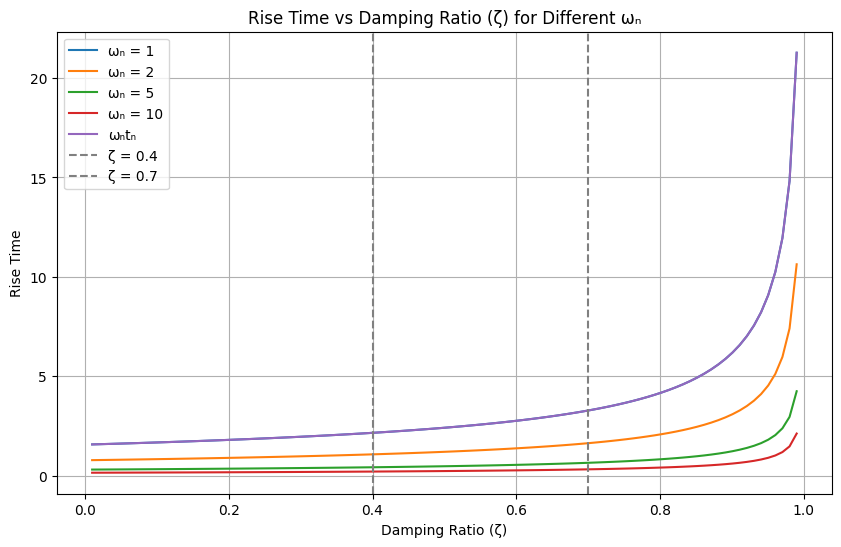

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of zeta and omega_n values
zeta_values = np.linspace(0.01, 0.99, 100)  # Zeta values from 0.01 to 0.99
omega_n_values = np.array([1, 2, 5, 10])    # Different omega_n values

# Function to calculate rise time
def rise_time(zeta, omega_n):
    return (np.pi - np.arccos(zeta)) / (omega_n * np.sqrt(1 - zeta**2))

def normalised_rise_time(zeta):
    return (np.pi - np.arccos(zeta)) / (np.sqrt(1 - zeta**2))
    
# Plotting
plt.figure(figsize=(10, 6))
for omega_n in omega_n_values:
    rt = rise_time(zeta_values, omega_n)    
    plt.plot(zeta_values, rt, label=f'ωₙ = {omega_n}')

wnrt = normalised_rise_time(zeta_values)
plt.plot(zeta_values, wnrt, label=f'ωₙtₙ')


# Add vertical lines at zeta = 0.4 and zeta = 0.7
plt.axvline(x=0.4, color='gray', linestyle='--', linewidth=1.5, label='ζ = 0.4')
plt.axvline(x=0.7, color='gray', linestyle='--', linewidth=1.5, label='ζ = 0.7')


plt.title('Rise Time vs Damping Ratio (ζ) for Different ωₙ')

plt.xlabel('Damping Ratio (ζ)')
plt.ylabel('Rise Time')
plt.legend()
plt.grid(True)
plt.show()


### Superamento del picco ($M_p$)

Il superamento del picco è dato da:

$$\Grande M_p = e^{-\frac{\pi \zeta}{\sqrt{1 - \zeta^2}}} $$

In questo caso $ M_p $ dipende esclusivamente dal rapporto di smorzamento $ \zeta $.

Vorremmo che il tempo di salita $t_r$ fosse il più breve possibile, ma _anche_ che il superamento del picco rimanesse piccolo. Un elevato superamento del picco significa che il sistema è prossimo all'instabilità e anche piccole variazioni dei parametri potrebbero rendere il sistema instabile.

In genere, $ M_p $ è accettabile quando è compreso tra $ 5\% e 40\%$. È accettabile anche un valore inferiore a $5\%$, ma in genere ciò significa che il tempo di salita sarà molto elevato.

Ciò significa che in genere: $0,4 < \zeta < 0,7$. Con riferimento alla figura precedente, in questo intervallo $\omega_n t_r$ (il tempo di salita normalizzato) è praticamente costante e non influenzato troppo dalla variazione del rapporto di smorzamento.

Se questo è vero allora possiamo dire che il tempo di salita è l’inverso della frequenza naturale non smorzata:

$$ \omega_n t_r = cost \Rightarrow t_r = \frac{1}{\omega_n} cost$$

### Tempo di salita e larghezza di banda

Per ottimizzare le prestazioni di un sistema di controllo, in particolare la sua velocità di risposta, spesso miriamo a diminuire il tempo di salita. Il tempo di salita, che indica quanto velocemente un sistema risponde ai cambiamenti, è inversamente correlato alla frequenza naturale del sistema, $ \omega_n $. Pertanto, per ridurre il tempo di salita, una strategia comune è progettare il sistema in modo tale che $ \omega_n $ sia il più grande possibile.

Tuttavia, questo approccio comporta un avvertimento significativo. Aumentando $ \omega_n $ aumenta anche la larghezza di banda del sistema. La larghezza di banda, in termini semplici, è la gamma di frequenze su cui il sistema può operare efficacemente. Una larghezza di banda maggiore significa che il sistema diventa più sensibile a una gamma più ampia di frequenze, comprese quelle nella gamma più alta.

La sfida con una larghezza di banda ampia è che consente ai segnali ad alta frequenza, che spesso sono rumore, di penetrare nel sistema. Questi segnali ad alta frequenza possono influire negativamente sulle prestazioni del sistema. Al contrario, i segnali utili nella maggior parte dei sistemi di controllo hanno tipicamente una frequenza più bassa. Pertanto, sebbene un'ampia larghezza di banda possa migliorare la velocità di risposta, può compromettere la capacità del sistema di filtrare il rumore indesiderato.

Pertanto, quando si progetta un tempo di salita ottimale, è necessario considerare il compromesso tra velocità di risposta e immunità al rumore. L'obiettivo non è raggiungere il tempo di salita teorico più piccolo, ma trovare un equilibrio pratico che garantisca l'affidabilità e la stabilità del sistema. Questo equilibrio è in gran parte influenzato dalle limitazioni della larghezza di banda.

La relazione tra la velocità di risposta (misurata dal tempo di salita) e la larghezza di banda del sistema è quasi diretta: una risposta più rapida (tempo di salita inferiore) corrisponde a una larghezza di banda più ampia. Tuttavia, una larghezza di banda infinita non è pratica perché porterebbe a un'eccessiva interferenza di rumore. Di conseguenza, un tempo di salita pari a zero, che richiederebbe una larghezza di banda infinita, è irraggiungibile.

L'equilibrio appropriato tra tempo di salita e larghezza di banda dipende fortemente dai componenti e dalle caratteristiche specifiche del sistema. Ad esempio, se il sistema impiega sensori che non generano rumore ad alta frequenza, potrebbe essere fattibile progettare una larghezza di banda maggiore (e quindi un tempo di salita inferiore) senza compromettere in modo significativo le prestazioni del sistema. Ogni sistema richiede un approccio su misura, considerando il suo hardware e il suo ambiente operativo unici.

### Considerazioni sulla stabilità


<table>
<tr>
    <img src="../pics/19_Design_of_feedback_control_system_roots
.png?1" alt="19_Design_of_feedback_control_system_roots
" style="width:450px;"/>
</tr></table>


Nel contesto dei sistemi di controllo, in particolare quelli modellati come sistemi del secondo ordine, le caratteristiche di stabilità e risposta sono significativamente influenzate da due parametri: il rapporto di smorzamento ($ \zeta $) e la frequenza naturale ($ \omega_n $). Il rapporto di smorzamento $ \zeta $ gioca un ruolo fondamentale nel governare il comportamento oscillatorio del sistema e la sua capacità di raggiungere l'equilibrio. Un $ \zeta $ più alto si traduce in meno oscillazioni e in un sistema più smorzato, che si stabilizza più rapidamente ma può avere una risposta più lenta. Al contrario, un $ \zeta $ inferiore porta a un sistema più sottosmorzato, caratterizzato da oscillazioni più pronunciate, e può rischiare instabilità se diventa troppo basso.

La frequenza naturale $ \omega_n $, che rappresenta la velocità di oscillazione intrinseca del sistema in assenza di smorzamento, influenza la velocità di risposta del sistema. Un $ \omega_n $ più elevato consente in genere tempi di risposta più rapidi ma, abbinato a un basso rapporto di smorzamento, può indurre oscillazioni rapide, portando il sistema verso l'instabilità.

Fondamentalmente, il superamento del picco ($ M_p $) è intimamente legato a questi parametri. $ M_p $, definito come il picco massimo della curva di risposta in percentuale rispetto al valore finale, è direttamente influenzato da $ \zeta $. Nello specifico, $ M_p = e^{-\frac{\pi \zeta}{\sqrt{1 - \zeta^2}}} $ illustra che un rapporto di smorzamento più elevato riduce il superamento del picco, allontanando il sistema dall'instabilità. Questa relazione evidenzia il delicato equilibrio richiesto nella progettazione del sistema di controllo: garantire la reattività e ridurre al minimo il superamento mantenendo la stabilità. Pertanto, la selezione di $ \zeta $ e $ \omega_n $ deve essere effettuata con una profonda comprensione del loro impatto sia sulla risposta transitoria (tempo di salita, superamento) che sulla stabilità complessiva del sistema.

Ad esempio, un superamento di $100\%$ significa che i poli si trovano sull’asse $j\omega$ e quindi il sistema è marginalmente stabile.

Qualitativamente, per i sistemi del secondo ordine:
- $\zeta$ è indicativo di stabilità.
- $\omega_n$ è indicativo della velocità di risposta.


----

In altre parole, la stabilità di un sistema di controllo dipende da due parametri chiave: il rapporto di smorzamento $ \zeta $ e la frequenza naturale $ \omega_n $.

- **rapporto di smorzamento $ \zeta $**: il rapporto di smorzamento $ \zeta $ determina principalmente la capacità del sistema di mitigare le oscillazioni e ritornare all'equilibrio.
    - Un $\zeta$ più alto indica generalmente un sistema più smorzato, che tende a stabilizzarsi più rapidamente ma può rispondere più lentamente ai cambiamenti.
    - Al contrario, un $ \zeta $ inferiore porta a un sistema meno smorzato che può mostrare un comportamento più oscillatorio, avvicinandosi potenzialmente all'instabilità se è troppo basso.
 
- **frequenza naturale $ \omega_n $**: La frequenza naturale $ \omega_n $, invece, è indicativa della tendenza intrinseca del sistema ad oscillare ad una velocità particolare in assenza di smorzamento.
    - Un $ \omega_n $ più alto può contribuire a un tempo di risposta più rapido, ma se combinato con un rapporto di smorzamento basso, può rendere il sistema soggetto a oscillazioni rapide e potenzialmente instabili.
    
L'interazione tra $ \zeta $ e $ \omega_n $ è quindi importante: mentre un $ \omega_n $ più alto può migliorare la reattività del sistema, deve essere bilanciato con un $ \zeta $ appropriato per garantire che il sistema rimanga stabile e non oscilli eccessivamente . Questo equilibrio è fondamentale nella progettazione dei sistemi di controllo, poiché garantisce che i sistemi siano reattivi e stabili.

----

Per calcolare il superamento del picco ($M_p$) per $ \zeta = 0,4 $ e $ \zeta = 0,7 $ in Python, possiamo utilizzare la libreria `numpy` per i calcoli numerici.

La cella sottostante definisce una funzione "peak_overshoot" che prende un rapporto di smorzamento $ \zeta $ e calcola il superamento del picco utilizzando la formula data. La funzione viene quindi utilizzata per calcolare il superamento del picco per $ \zeta = 0,4 $ e $ \zeta = 0,7 $. I risultati vengono stampati sia in formato decimale che percentuale.

Ecco il codice Python per farlo:

In [ ]:
import numpy as np

# Function to calculate peak overshoot
def peak_overshoot(zeta):
    return np.exp(-np.pi * zeta / np.sqrt(1 - zeta**2))

# Calculate peak overshoot for zeta = 0.4 and zeta = 0.7
mp_04 = peak_overshoot(0.4)
mp_07 = peak_overshoot(0.7)

print(f"Peak Overshoot for ζ = 0.4: {mp_04:.4f} or {mp_04 * 100:.2f}%")
print(f"Peak Overshoot for ζ = 0.7: {mp_07:.4f} or {mp_07 * 100:.2f}%")

Peak Overshoot for ζ = 0.4: 0.2538 or 25.38%
Peak Overshoot for ζ = 0.7: 0.0460 or 4.60%


### Orario di punta ($t_p$)

Il momento di picco $t_p$ è simile al termine di salita in termini di comportamento qualitativo.

È importante comprendere anche la relazione tra l'ora di picco ($t_p$)) e la frequenza naturale ($\omega_n$)). Il tempo di picco è definito come il tempo necessario affinché la risposta del sistema raggiunga il suo primo picco massimo. Dalle premesse teoriche fornite, il tempo di picco è dato dalla formula:

$$ t_p = \frac{\pi}{\omega_n \sqrt{1 - \zeta^2}} $$

Questa equazione illustra che il tempo di picco è inversamente proporzionale alla frequenza naturale ($\omega_n$) del sistema, pur essendo influenzato anche dal rapporto di smorzamento ($\zeta$). Nello specifico, all'aumentare di $\omega_n$, il tempo di picco $t_p$ diminuisce, il che implica che il sistema raggiunge la risposta di picco più rapidamente. Questa relazione evidenzia che un sistema con una frequenza naturale più elevata risponderà più velocemente, raggiungendo il suo picco in un lasso di tempo più breve.

La presenza di $\sqrt{1 - \zeta^2}$) al denominatore indica anche l'influenza del rapporto di smorzamento $\zeta$) sull'ora di picco. Tuttavia, il fattore dominante nel determinare $t_p$ è $\omega_n$, poiché l'impatto del rapporto di smorzamento è moderato dalla radice quadrata e dalla sottrazione dall'unità.

In termini pratici, progettare un sistema di controllo con una frequenza naturale più elevata $\omega_n$ può essere utile per ottenere risposte più rapide. Tuttavia, questo deve essere attentamente bilanciato con considerazioni sulla stabilità del sistema e sul superamento, poiché influenzato sia da $\omega_n$ che da $\zeta$. Il tempo di picco funge quindi da indicatore essenziale nella progettazione e nell'analisi dei sistemi di controllo, in particolare quando sono desiderabili risposte rapide, ma non a scapito della stabilità e delle prestazioni del sistema.

### Tempo di assestamento ($t_s$)

Il calcolo di un'espressione analitica per il tempo di assestamento nei sistemi di controllo, in particolare per sistemi di ordine superiore o complessi, presenta diverse sfide.

Il tempo di assestamento è definito come la durata dopo la quale la risposta del sistema rimane all'interno di una banda di tolleranza specificata attorno al valore di stato stazionario e non esce successivamente da questa banda.

Per i sistemi del secondo ordine, questo può spesso essere approssimato con formule standard, specialmente quando i sistemi sono poco smorzati. Tuttavia, per i sistemi che mostrano un comportamento più complesso, come quelli con dinamiche di ordine superiore, non linearità o parametri variabili, derivare un'espressione analitica esatta diventa notevolmente più complicato.

Una delle principali difficoltà risiede nelle caratteristiche di risposta del sistema, che possono variare in modo significativo in base a fattori come il rapporto di smorzamento ($ \zeta $), la frequenza naturale ($ \omega_n $) e la presenza di elementi non lineari o disturbi esterni. La risposta potrebbe mostrare oscillazioni, superamenti o tassi di decadimento variabili, che non sono semplici da incapsulare in un'unica formula. Inoltre, i criteri per "stabilirsi" all'interno di una fascia di tolleranza non sono sempre chiari negli scenari pratici, in cui rumore e fattori esterni possono far fluttuare la risposta attorno al valore desiderato.

Di conseguenza, i metodi numerici e le simulazioni diventano strumenti essenziali per determinare con precisione il tempo di assestamento. Consentono la modellazione dettagliata del comportamento del sistema in varie condizioni, catturando sfumature che i metodi analitici potrebbero non cogliere. Il seguente codice Python esemplifica questo approccio numerico, illustrando come il tempo di assestamento varia con il rapporto di smorzamento ($ \zeta $) in un sistema del secondo ordine. Questa analisi numerica fornisce uno strumento più flessibile e pratico per comprendere e prevedere il comportamento del sistema in scenari reali.

### Tempo di assestamento rispetto al rapporto di smorzamento

Nei sistemi di controllo, la relazione tra il tempo di assestamento e il rapporto di smorzamento ($\zeta$) può essere efficacemente illustrata attraverso un grafico.

Questo grafico è particolarmente interessante in quanto rivela la natura non lineare di come varia il tempo di assestamento con diversi valori di $\zeta$.

Nello specifico si evidenzia una caratteristica notevole per cui il tempo di assestamento subisce un forte aumento a determinati valori di $\zeta$.

Questo aumento non è lineare o graduale ma avviene in punti specifici, riflettendo la complessa dinamica di come lo smorzamento influisce sul tempo necessario affinché un sistema si stabilizzi entro i parametri operativi desiderati. Tale rappresentazione grafica è fondamentale per comprendere e progettare i sistemi di controllo, in particolare nella messa a punto dei rapporti di smorzamento per ottenere prestazioni ottimali.

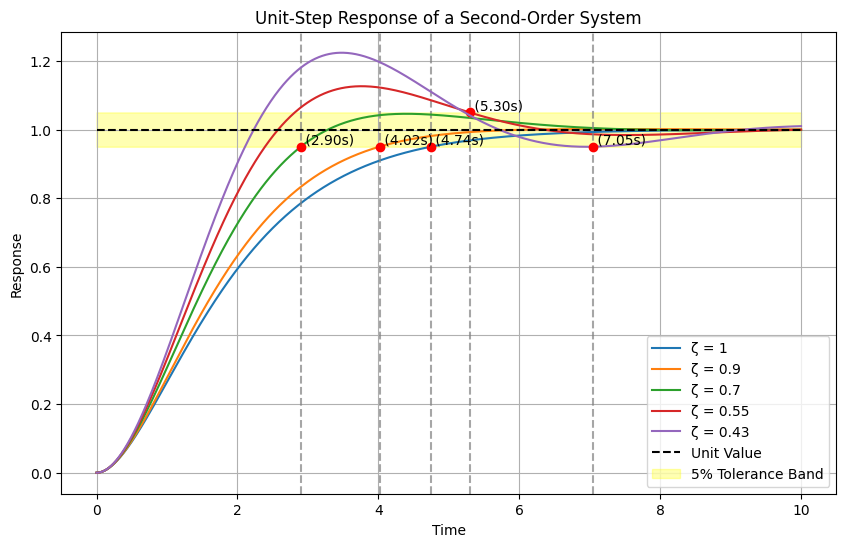

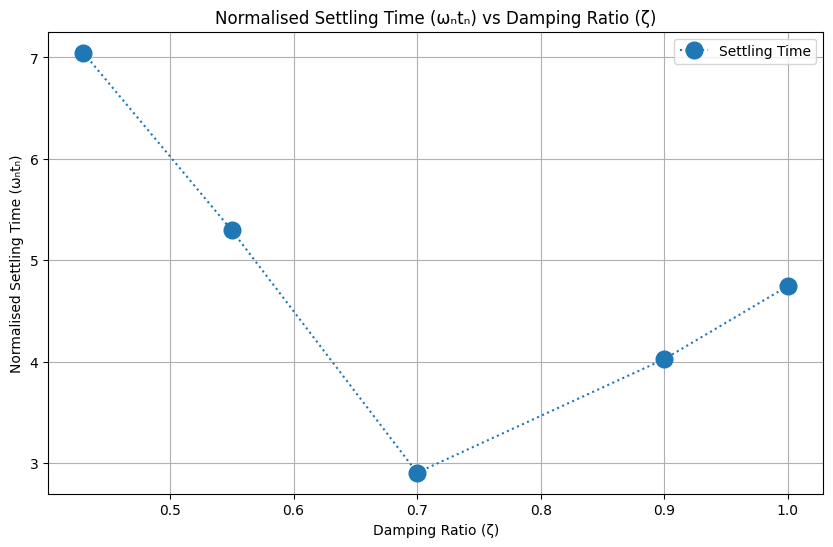

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 10, 1000)  # Extended time range for more clarity

# System parameters
zeta_values = [1, 0.9, 0.7, 0.55, 0.43]
omega_n = 1  # Natural frequency

# Function for second-order system unit-step response
def unit_step_response(t, zeta, omega_n):
    if zeta < 1:  # Underdamped
        omega_d = omega_n * np.sqrt(1 - zeta**2)
        return 1 - np.exp(-zeta * omega_n * t) * (np.cos(omega_d * t) + (zeta/np.sqrt(1-zeta**2)) * np.sin(omega_d * t))
    elif zeta == 1:  # Critically damped
        return 1 - np.exp(-omega_n * t) * (1 + omega_n * t)

# Compute settling time
def compute_settling_time(t, response, tolerance=0.05):
    upper_bound = 1 + tolerance
    lower_bound = 1 - tolerance
    for i in range(len(response)):
        if all(response[j] < upper_bound and response[j] > lower_bound for j in range(i, len(response))):
            return t[i]
    return np.nan

# Storing settling times
settling_times = []

# Plotting responses for different zeta values
plt.figure(figsize=(10, 6))
for zeta in zeta_values:
    y = unit_step_response(t, zeta, omega_n)
    settling_time = compute_settling_time(t, y)
    settling_times.append(settling_time)
    plt.plot(t, y, label=f'ζ = {zeta}')
    # Annotate settling time
    if not np.isnan(settling_time):
        plt.axvline(x=settling_time, color='gray', linestyle='--', alpha=0.7)
        settling_point = y[np.argmin(np.abs(t - settling_time))]
        plt.plot(settling_time, settling_point, 'ro')  # Mark the settling point
        plt.text(settling_time, settling_point, f' ({settling_time:.2f}s)', verticalalignment='bottom')
        #plt.text(settling_time, settling_point, f' ({settling_time:.2f}, {settling_point:.2f})', verticalalignment='bottom')


# Unit value and tolerance band
plt.plot(t, np.ones_like(t), 'k--', label='Unit Value')
plt.fill_between(t, 0.95, 1.05, color='yellow', alpha=0.3, label='5% Tolerance Band')

plt.title('Unit-Step Response of a Second-Order System')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

    
# Plotting Settling Time vs Zeta
plt.figure(figsize=(10, 6))
plt.plot(zeta_values, settling_times, 'o:', label='Settling Time', markersize=12)
plt.title('Normalised Settling Time (ωₙtₙ) vs Damping Ratio (ζ)')
plt.xlabel('Damping Ratio (ζ)')
plt.ylabel('Normalised Settling Time (ωₙtₙ)')
plt.grid(True)
plt.legend()
plt.show()


Il grafico mostra la risposta tipica di un sistema di secondo ordine che si assesta al suo valore finale all'interno di una fascia di tolleranza di $5\%$ (quindi tra valori 0,95-1,05). Il grafico mostra anche la risposta del sistema per un sistema criticamente smorzato ($\zeta=1$).

Possiamo definire una curva migliore variando $\zeta$:

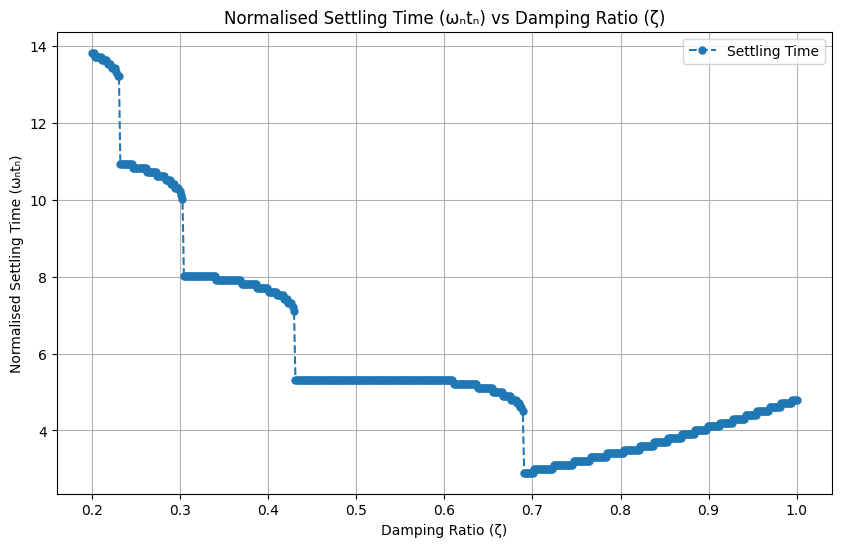

In [ ]:
# Time array
t = np.linspace(0, 100, 1000)  # Extended time range for more clarity and lower damping ratios

zeta_values = np.linspace(0.2, 1, 500) 
settling_times =[]
for zeta in zeta_values:
    y = unit_step_response(t, zeta, omega_n)
    settling_time = compute_settling_time(t, y)
    settling_times.append(settling_time)
    
# Plotting Settling Time vs Zeta
plt.figure(figsize=(10, 6))
plt.plot(zeta_values, settling_times, 'o--', label='Settling Time', markersize=5)
plt.title('Normalised Settling Time (ωₙtₙ) vs Damping Ratio (ζ)')
plt.xlabel('Damping Ratio (ζ)')
plt.ylabel('Normalised Settling Time (ωₙtₙ)')
plt.grid(True)
plt.legend()
plt.show()


### Approssimazione del tempo di assestamento

Approssimare il tempo di assestamento di un sistema di controllo utilizzando l'inviluppo della sua risposta è un approccio pratico, soprattutto nel caso di sistemi sottosmorzati in cui la risposta presenta un comportamento oscillatorio.
L'inviluppo fornisce una chiara rappresentazione visiva dell'entità massima della risposta del sistema nel tempo, che è particolarmente utile per identificare quando l'output del sistema si stabilizza all'interno di una fascia di tolleranza specificata.

**Ciò consentirà di avere un'approssimazione della parte in cui $0 < \zeta < 0.7$ in the above plot. Remember that typical values for the damping ratio will be in this range. The behaviour for values of $\zeta>0.7$ è diverso.**

La forma standard della risposta di un sistema del secondo ordine sottosmorzato può essere espressa come:

$$ y(t) = 1 - \frac{e^{-\zeta \omega_n t}}{\sqrt{1 - \zeta^2}} \sin(\omega_d t + \theta) $$

dove $ \zeta $ è il rapporto di smorzamento, $ \omega_n $ è la frequenza naturale e $ \omega_d = \omega_n \sqrt{1-\zeta^2} $ è la frequenza naturale smorzata.


L'inviluppo di questa risposta oscillatoria è dato dal termine esponenziale di decadimento:

$$
1 \pm \frac{e^{-\zeta \omega_n t}}{\sqrt{1 - \zeta^2}}
$$

Questo inviluppo cattura la natura oscillatoria della risposta del sistema e il suo decadimento esponenziale.

Per approssimare il tempo di assestamento, è possibile impostare l'inviluppo uguale al livello di tolleranza e risolvere per il tempo $ t $. Ad esempio, per un livello di tolleranza del 5%, l'equazione diventa:

$$ 1 + \frac{e^{-\zeta \omega_n t_s}}{\sqrt{1 - \zeta^2}} = 0,05 $$

Risolvendo per $t$ si ottiene:

$$
\zeta\omega_n t_s = -\ln(0,05\sqrt{1-\zeta^2})
$$

E

$$
\omega_n t_s = -\frac{1}{\zeta}\ln(0.05\sqrt{1-\zeta^2})
$$

e infine:

$$
 t_s = -\frac{1}{\omega_n\zeta}\ln(0,05\sqrt{1-\zeta^2})
$$

Si noti che $\ln(0.05\sqrt{1-\zeta^2}) \in [-3, -3.3]$, per $0 < \zeta < 0.7$ (che è ciò che stiamo analizzando).

Possiamo ottenere un’ulteriore approssimazione come:

$$
 t_s = \frac{3}{\omega_n\zeta}
$$

Scriviamo il codice Python che traccia questo inviluppo per un intervallo di valori $\zeta$ e indica il tempo di assestamento associato all'interno di una fascia di tolleranza del 5%. Il tempo di assestamento può essere stimato trovando il punto in cui la busta entra per la prima volta nella fascia di tolleranza e non ne esce successivamente.

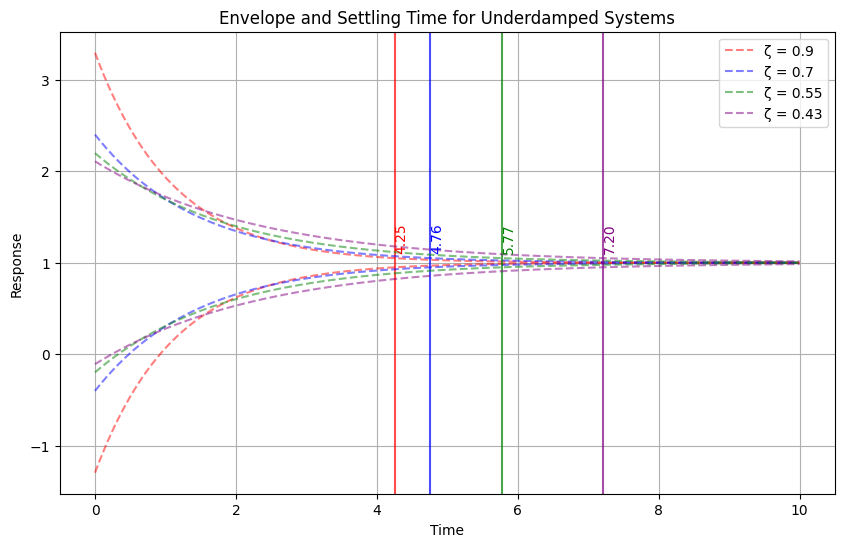

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 10, 1000)  # Time range for plotting

# System parameters
zeta_values = [0.9, 0.7, 0.55, 0.43]  # zeta values - to highlight the difference use [0.2, 0.5, 0.7] 
omega_n = 1  # Natural frequency
colors = ['red', 'blue', 'green', 'purple']  # Colors for each zeta value

# Plotting
plt.figure(figsize=(10, 6))
for zeta, color in zip(zeta_values, colors):
    envelope_upper = 1 + np.exp(-zeta * omega_n * t) / np.sqrt(1 - zeta**2)
    envelope_lower = 1 - np.exp(-zeta * omega_n * t) / np.sqrt(1 - zeta**2)
    
    # Plot envelope
    plt.plot(t, envelope_upper, color=color, linestyle='--', alpha=0.5)
    plt.plot(t, envelope_lower, color=color, linestyle='--', alpha=0.5, label=f'ζ = {zeta}')

    # Settling time estimation
    settling_time = -np.log(0.05 * np.sqrt(1 - zeta**2)) / (zeta * omega_n)
    plt.axvline(x=settling_time, color=color, linestyle='-', alpha=0.7)
    plt.text(settling_time, 1.1, f'{settling_time:.2f}', rotation=90, verticalalignment='bottom', color=color)

plt.title('Envelope and Settling Time for Underdamped Systems')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()


### Tempo di assestamento entro una banda di tolleranza del 2%.

Nelle specifiche del sistema di controllo viene comunemente utilizzata una banda di tolleranza del 2%. Attraverso dettagliate simulazioni al computer, è stato osservato che il rapporto di smorzamento critico per raggiungere una fascia di tolleranza del 2% è $\zeta = 0,76$. Il comportamento del tempo di assestamento normalizzato ($\omega_n t_s$) rispetto a $\zeta$ in questo scenario mostra uno schema notevole:

- Quando $\zeta$ varia da 1 a 0,76, il tempo di assestamento normalizzato diminuisce.
- Al diminuire di $\zeta$ da 0,76 a 0, il tempo di assestamento normalizzato aumenta.

La sfida nell'ottenere un'espressione analitica per il tempo di assestamento all'interno di una banda di tolleranza del 2%, come prima, risiede nella sua complessa natura non lineare. Tuttavia è possibile fare un’approssimazione come segue:

$$ \zeta \omega_n t_s = -\ln\left(0.02 \sqrt{1-\zeta^2}\right) $$

Qui, il termine logaritmico $\ln(0.02 \sqrt{1-\zeta^2})$ varia tra -3,9 e -4,34 per valori $\zeta$ compresi nell'intervallo da 0 a 0,76, raggiungendo il suo minimo a $\zeta =0,76$. Riscrivendo questa espressione otteniamo:

$$ t_s = -\frac{1}{\zeta \omega_n} \ln\left(0.02 \sqrt{1-\zeta^2}\right) $$

In questo contesto è importante notare che $\zeta \omega_n$ è il reciproco della costante di tempo della curva di inviluppo. Pertanto, per una banda di tolleranza del 2%, il tempo di assestamento può essere approssimato utilizzando la costante di tempo dell'inviluppo del sistema:

$$ t_s = \frac{4}{\zeta \omega_n} $$ (cioè quattro volte la costante di tempo)

Questa approssimazione utilizza efficacemente la costante di tempo della curva di inviluppo, semplificando il calcolo del tempo di assestamento all'interno della banda di tolleranza specificata.

Questa è l'espressione per il tempo di assestamento che utilizzeremo la maggior parte del tempo.

## Comprensione dell'errore allo stato stazionario

L'errore allo stato stazionario è una metrica chiave nei sistemi di controllo che quantifica la differenza tra l'uscita desiderata (il setpoint) e l'uscita effettiva del sistema quando il tempo si avvicina all'infinito. In termini più semplici, misura quanto l'output del sistema può avvicinarsi al valore desiderato dopo che i transitori si sono estinti.

### Errore di stato stazionario per ingressi diversi

La natura dell'errore allo stato stazionario varia in modo significativo in base al tipo di segnale di ingresso a cui il sistema sta rispondendo.

In genere vengono considerati tre tipi standard di ingressi: gradino, rampa e parabolico. Quando si progetta un controller per lo stato stazionario, in genere è importante comprendere il comportamento del sistema per tutti questi input.

L'errore a stato stazionario per ciascun tipo di input evidenzia la capacità del sistema di tracciare diversi tipi di segnali:

#### 1. Ingresso passo

   Per un input graduale (un cambiamento improvviso nell'output desiderato), un sistema del secondo ordine ben progettato avrà spesso un errore a stato stazionario pari a zero. Questo perché il sistema può regolare la propria uscita per corrispondere al nuovo setpoint dopo un certo tempo.
   
   Ciò è chiaro osservando la risposta in passi unitari per $t \rightarrow \infty$:
   
   $$ y(t) = 1 - \frac{e^{-\zeta \omega_n t}}{\sqrt{1 - \zeta^2}} \sin(\omega_d t + \theta) $$

#### 2. **Ingresso rampa:**
   Un ingresso di rampa (un setpoint in continuo aumento o diminuzione) introduce una nuova sfida. L'errore a regime per un ingresso di rampa è generalmente diverso da zero per un sistema standard del secondo ordine. Indica l'incapacità del sistema di tenere il passo con il setpoint in continua evoluzione. L'errore a regime in risposta a un ingresso di rampa può essere calcolato utilizzando il teorema del valore finale della teoria della trasformata di Laplace.

$$R(s) = \frac{1}{s^2}$$
    
    E
    
$$Y(s) = \frac{\omega_n^2}{s^2(s^2+2\zeta\omega_ns+\omega_n^2)}$$
    
il cui inverso è:

$$
y(t) = t - \frac{2\zeta}{\omega_n} + \frac{e^{-\zeta\omega_nt}}{\omega_n\sqrt{1-\zeta^2}}\sin(\ omega_dt+2\theta)
$$

dove $\theta = \cos^{-1}\zeta$ e $\omega_d = \omega_n\sqrt{1-\zeta^2}$

Per creare uno schizzo Python della risposta a un input rampa, utilizzeremo le formule di risposta fornite.

Il codice seguente traccia sia la risposta del sistema a un ingresso di rampa sia l'ingresso di rampa stesso. La funzione ramp_response calcola la risposta del sistema utilizzando la formula fornita. Il grafico illustrerà come si comporta l'output del sistema nel tempo in risposta a un input che aumenta linearmente. I parametri $\zeta$ e $\omega_n$ possono essere regolati per vedere come le diverse caratteristiche del sistema influenzano la risposta.

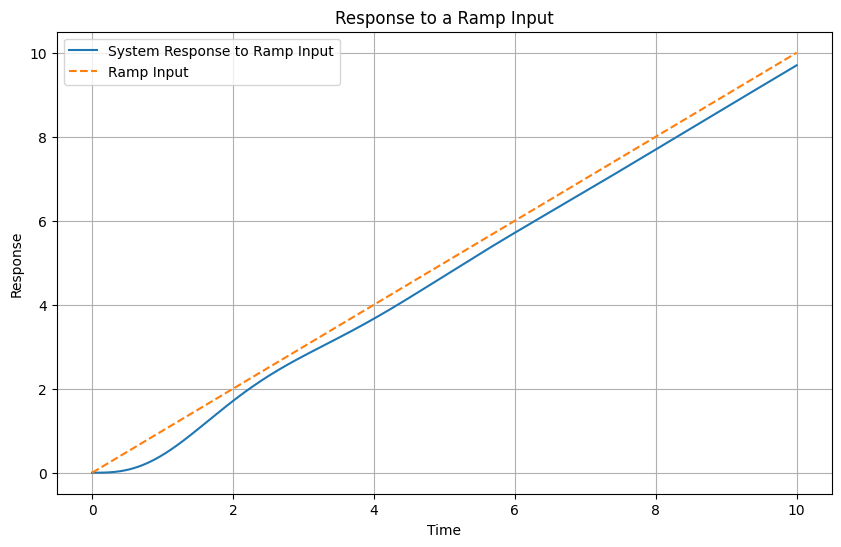

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 10, 500)

# System parameters
zeta = 0.3  # Example damping ratio
omega_n = 2  # Example natural frequency

# Calculate omega_s and theta
omega_s = omega_n * np.sqrt(1 - zeta**2)
theta = np.arccos(zeta) # np.arctan(np.sqrt(1 - zeta**2) / zeta)

# Response to ramp input
def ramp_response(t, zeta, omega_n, omega_s, theta):
    return t - (2 * zeta / omega_n) + (np.exp(-zeta * omega_n * t) / (omega_n * np.sqrt(1 - zeta**2))) * np.sin(omega_s * t + 2 * theta)

# Ramp input
ramp_input = t

# Calculating response
response = ramp_response(t, zeta, omega_n, omega_s, theta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, response, label='System Response to Ramp Input')
plt.plot(t, ramp_input, label='Ramp Input', linestyle='--')
plt.title('Response to a Ramp Input')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()


##### Commenti

Si noti che da una prospettiva transitoria non ci sono nuovi comportamenti. Ci sono delle oscillazioni che abbiamo catturato già analizzando la risposta unitaria.
Questo è il motivo per cui non è necessario analizzare il transitorio a più ingressi.

Se tuttavia guardiamo allo stato stazionario, ora abbiamo un errore di stato stazionario.

Dato:
$$
y(t) = t - \frac{2\zeta}{\omega_n} + \frac{e^{-\zeta\omega_nt}}{\omega_n\sqrt{1-\zeta^2}}\sin(\ omega_dt+2\theta)
$$

quando $t \rightarrow \infty$:

$$
y_{ss} = t - \frac{2\zeta}{\omega_n}
$$

L'uscita segue l'ingresso della rampa ma con un errore di stato stazionario $\frac{2\zeta}{\omega_n}$.

L’errore di stato stazionario può essere formalmente calcolato come:

$$
e_{ss} = r - y_{ss} = t - \big(t - \frac{2\zeta}{\omega_n}\big) = \frac{2\zeta}{\omega_n}
$$

### Calcolo analitico

Analiticamente, l'errore a regime può essere determinato utilizzando il teorema del valore finale delle trasformate di Laplace.

In questo caso non siamo interessati al comportamento transitorio che analizziamo solo attraverso la risposta all'input di passo unitario.

Il teorema afferma che il valore di stato stazionario di una funzione può essere trovato prendendo il limite quando $s$ (la variabile di Laplace) si avvicina allo zero di $s$ volte la trasformata di Laplace della funzione.

Ad esempio, l'errore a regime per un ingresso di rampa può essere calcolato applicando il teorema del valore finale al segnale di errore $E(s)$, che è la differenza tra il segnale di ingresso $R(s)$ e il segnale di uscita $Sì$. Ciò comporta la valutazione del limite:

$$ e_{ss} = \lim_{s \to 0} sE(s) $$

dove $E(s) = R(s) - Y(s)$.

Per il nostro sistema:

<table>
<tr>
    <img src="../pics/19_Design_of_feedback_control_system
.png?1" alt="19_Design_of_feedback_control_system
" style="width:450px;"/>
</tr></table>

$$
\frac{E(s)}{R(s)} = \frac{1}{1+G(s)}
$$


Da cui:

$$
E(s) = \frac{R(s)}{1+G(s)}
$$

Applicando il teorema del valore finale:

$$ e_{ss} = \lim_{s \to 0} s \frac{R(s)}{1+G(s)} $$

_Ricorda le condizioni di applicabilità del teorema del valore finale: $sE(s)$ non ha poli sull'asse immaginario o nel RHP_.

$$
\frac{E(s)}{R(s)} = \frac{1}{1 + \frac{\omega_n^2}{s(s+2\zeta\omega_n)}} = \frac{s( s+2\zeta\omega_n)}{s^2 +2\zeta\omega_ns + \omega_n^2}
$$

dato che $R(s)=\frac{1}{s^2}$ otteniamo:

$$
E(s) = \frac{(s+2\zeta\omega_n)}{s(s^2 +2\zeta\omega_n s + \omega_n^2)}
$$

$$
sE(s) = \frac{(s+2\zeta\omega_n)}{(s^2 +2\zeta\omega_n s + \omega_n^2)}
$$

Questa funzione di trasferimento non ha poli sull'asse immaginario o nel semipiano destro e possiamo applicare il Teorema del valore finale. **È importante verificare!**

e infine:

$$ e_{ss} = \lim_{s \to 0} s E(s) = \frac{2\zeta}{\omega_n}$$

#### 3. **Ingresso parabolico:**
   L'ingresso parabolico rappresenta uno scenario ancora più impegnativo, che in genere risulta in un errore infinito in stato stazionario per un sistema standard del secondo ordine. Ciò riflette l'incapacità del sistema di tracciare un segnale che cambia a una velocità accelerata.
   
   Applicando lo stesso ragionamento:
   $$
   R(s) = \frac{1}{s^3}
   $$
   
   E
   
   $$
   sE(s) = \frac{(s+2\zeta\omega_n)}{s(s^2 +2\zeta\omega_n s + \omega_n^2)}
   $$
   
   **Non possiamo applicare il Teorema del valore finale perché abbiamo un polo sull'asse immaginario.**
   
   Per comprendere l’errore di stato stazionario possiamo analizzare:
   
   $$
   E(s) = \frac{(s+2\zeta\omega_n)}{s^2(s^2 +2\zeta\omega_n s + \omega_n^2)}
   $$
   
   invertire questa espressione per ottenere $e(t)$ per $t\rightarrow \infty$.
   Questa funzione ha due poli all'origine, il che significa che possiamo interpretarla come un sistema instabile, cioè l'errore cresce senza limiti.
   
   Il sistema standard del secondo ordine nel circuito di retroazione non è in grado di seguire un input parabolico. Ciò significa che potrebbe essere necessario limitare questo sistema ai casi in cui gli ingressi sono solo gradini e rampe.
   In alternativa abbiamo bisogno di un controller adatto.

Per riassumere possiamo rieseguire lo stesso codice che avevamo nel notebook `18_Performance_of_Feedback_Systems`. La crescita illimitata dell'errore di stato stazionario per l'input parabolico è chiaramente visibile.

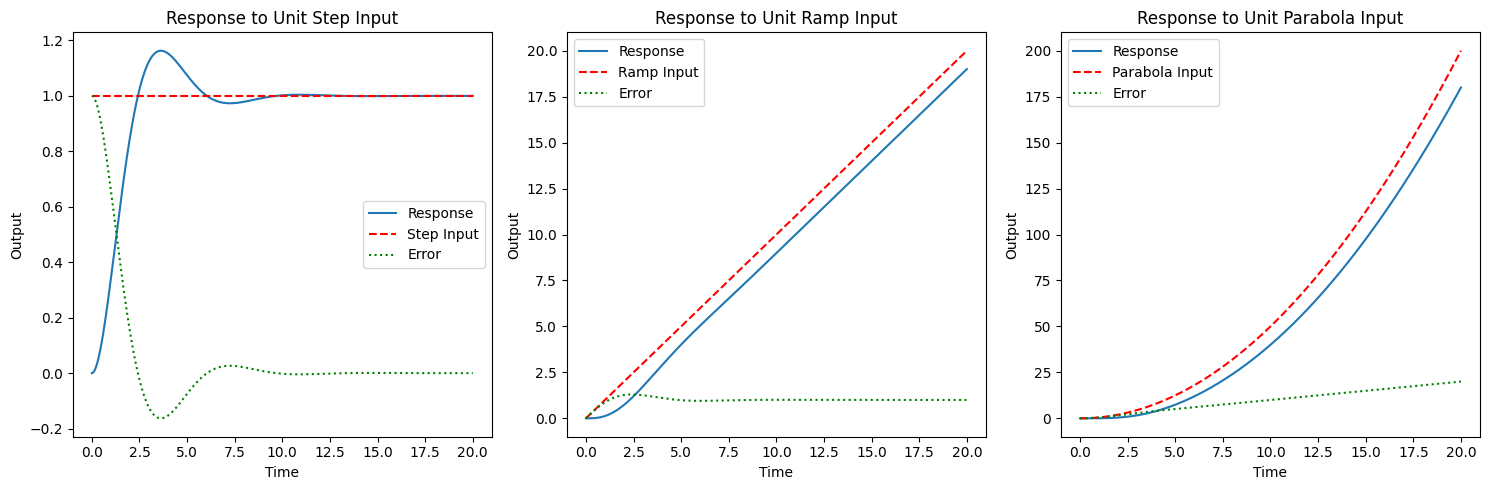

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Define system parameters (modify as needed for your example)
Kp = 1.0    # Proportional gain
omega_n = 1.0  # Natural frequency
zeta = 0.5  # Damping ratio
num = [Kp * omega_n**2]
den = [1, 2 * zeta * omega_n, omega_n**2]

# Create transfer function
G = control.tf(num, den)

# Time vector
t = np.linspace(0, 20, 1000)

# Unit Step Input
t_step, y_step = control.step_response(G, t)
e_step = 1 - y_step  # Steady-state error for step input

# Unit Ramp Input
t_ramp, y_ramp = control.forced_response(G, t, t)
e_ramp = t - y_ramp  # Steady-state error for ramp input

# Unit Parabola Input
t_parabola, y_parabola = control.forced_response(G, t, t**2 / 2)
e_parabola = t**2 / 2 - y_parabola  # Steady-state error for parabola input

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(t_step, y_step, label='Response')
plt.plot(t_step, np.ones_like(t_step), 'r--', label='Step Input')
plt.plot(t_step, e_step, 'g:', label='Error')
plt.title('Response to Unit Step Input')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t_ramp, y_ramp, label='Response')
plt.plot(t_ramp, t_ramp, 'r--', label='Ramp Input')
plt.plot(t_ramp, e_ramp, 'g:', label='Error')
plt.title('Response to Unit Ramp Input')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t_parabola, y_parabola, label='Response')
plt.plot(t_parabola, t_parabola**2 / 2, 'r--', label='Parabola Input')
plt.plot(t_parabola, e_parabola, 'g:', label='Error')
plt.title('Response to Unit Parabola Input')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()

plt.tight_layout()
plt.show()


### Implicazioni pratiche

In termini pratici, comprendere e calcolare l’errore di stato stazionario è fondamentale per la progettazione e la messa a punto del sistema. Aiuta a stabilire aspettative prestazionali realistiche e a scegliere il giusto tipo di controller o compensatore per ridurre al minimo l'errore per un dato tipo di input. Ad esempio, nei sistemi in cui è importante seguire un ingresso di rampa, i progettisti potrebbero optare per diverse impostazioni del controller o aggiungere un'azione integrale per ridurre l'errore a regime.

In sintesi, l’errore in stato stazionario è un aspetto vitale delle prestazioni del sistema di controllo, poiché offre informazioni sulla capacità di un sistema di mantenere il proprio output al livello desiderato o vicino ad esso in risposta a vari tipi di input. Analizzare e ridurre al minimo questo errore è una parte fondamentale della progettazione e dell'ottimizzazione del sistema di controllo.

## Esercizio e domande

Ora rafforziamo questi concetti con alcuni esercizi:
1. **Calcola il superamento del picco:** Dato un rapporto di smorzamento di 0,5, calcola il superamento del picco $ M_p $.
2. **Errore di stato stazionario per un ingresso di rampa:** Per un sistema con $ \zeta = 0,3 $ e $ \omega_n = 4 $, trovare l'errore di stato stazionario per un ingresso di rampa.
3. **Effetto della larghezza di banda sulla stabilità:** Discutere in che modo l'aumento della larghezza di banda influisce sulla stabilità del sistema e sulla sua capacità di respingere il rumore.